# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.15199999660253524


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
states.shape

(20, 33)

In [3]:
from collections import deque
import torch
import pickle
#from ddpg_agent import Agent
import matplotlib.pyplot as plt
import pdb
#agent = Agent(state_size=states.shape[1], action_size=action_size, random_seed=10)
#model.load_state_dict(torch.load(PATH))
#agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
#agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

In [9]:
test = torch.Tensor(1)
test.detach().numpy()[0]

1.0932426e-06

In [18]:
import numpy as np
import random
import copy
from collections import namedtuple, deque

from model import Actor, Critic

import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e5) #int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 3e-4         # learning rate of the actor 
LR_CRITIC = 3e-4       # learning rate of the critic
WEIGHT_DECAY = 0#0.0001   # L2 weight decay
UPDATE_EVERY = 10
UPDATES = 20

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.counter = 0
        self.lr_actor = LR_ACTOR
        self.lr_critic = LR_CRITIC
        self.update_every = UPDATE_EVERY
        self.updates = UPDATES
        self.tau = TAU
        self.actor_loss = 0
        self.critic_loss = 0

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=self.lr_actor)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=self.lr_critic, weight_decay=WEIGHT_DECAY)

        # Noise process
        self.noise = OUNoise(action_size, random_seed)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    def step(self, state, action, reward, next_state, done, ts): #ts = timestep
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        #pdb.set_trace()
        if state.shape[0] <= 1:
            self.memory.add(state, action, reward, next_state, done)
        else: 
            for i in range(20):
                self.memory.add(state[i,:], action[i,:], reward[i], next_state[i,:], done[i])

        # Learn, if enough samples are available in memory
        if (len(self.memory) > BATCH_SIZE) & (ts % self.update_every == 0):
            for _ in range(self.updates):
                #pdb.set_trace()
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            #pdb.set_trace()
            #action += self.noise.sample()
            action += np.maximum(0.1, eps) * self.noise.sample()
        return np.clip(action, -1, 1)

    def act2(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            #pdb.set_trace()
            #action += self.noise.sample()
            action += 0.1 * self.noise.sample()
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        #pdb.set_trace()
        self.critic_loss = critic_loss.item()
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        self.actor_loss = actor_loss.item()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.counter += 1
        #print(f"self.counter: {self.counter}")
        #if self.counter >= 4:
        #    self.soft_update(self.critic_local, self.critic_target, TAU)
        #    self.soft_update(self.actor_local, self.actor_target, TAU)
        #    self.counter = 0
            #print(f"self.counter: {self.counter}")
        self.soft_update(self.critic_local, self.critic_target, self.tau)
        self.soft_update(self.actor_local, self.actor_target, self.tau)

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [25]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    #def __init__(self, state_size, action_size, seed, fc_units=256):
    def __init__(self, state_size, action_size, seed, fc_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc_units)
        #self.fc2 = nn.Linear(fc_units, action_size)
        self.fc2 = nn.Linear(fc_units, np.int(fc_units/2))
        self.fc3 = nn.Linear(np.int(fc_units/2), action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        #self.fc2.weight.data.uniform_(-3e-3, 3e-3)
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        #return F.tanh(self.fc2(x))
        x = F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    #def __init__(self, state_size, action_size, seed, fcs1_units=256, fc2_units=256, fc3_units=128):
    def __init__(self, state_size, action_size, seed, fcs1_units=128, fc2_units=128, fc3_units=64):
        
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        #self.fc2 = nn.Linear(fcs1_units+action_size, fc3_units)
        self.fc3 = nn.Linear(fc2_units, fc3_units)
        self.fc4 = nn.Linear(fc3_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(*hidden_init(self.fc3))
        self.fc4.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = F.leaky_relu(self.fcs1(state))
        x = torch.cat((xs, action), dim=1)
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        return self.fc4(x)

In [12]:
#nisse = torch.load("checkpoint_actor.pth")

In [13]:

#agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
#agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

In [4]:
class StoreResults():
    def __init__(self):
        
        #self.dict = {"index": None, "desc": None, "result": None}
        self.load()
    
    def load(self):
        try:
            f = open("file.pkl", "rb")
            self.dicto = pickle.load(f)
            self.counter = max(list(self.dicto.keys())) + 1
            f.close()
        except:
            print("file missing")
            self.counter = 0
            self.dicto = {}
    def save(self, desc, result, ave_last_100, loss_dict):
        self.dicto[self.counter] = {}
        self.dicto[self.counter]["desc"] = desc
        self.dicto[self.counter]["BUFFER_SIZE"] = BUFFER_SIZE
        self.dicto[self.counter]["BATCH_SIZE"] = BATCH_SIZE
        self.dicto[self.counter]["GAMMA"] = GAMMA
        self.dicto[self.counter]["TAU"] = TAU
        self.dicto[self.counter]["LR_ACTOR"] = LR_ACTOR
        self.dicto[self.counter]["LR_CRITIC"] = LR_CRITIC
        self.dicto[self.counter]["WEIGHT_DECAY"] = WEIGHT_DECAY
        self.dicto[self.counter]["UPDATE_EVERY"] = UPDATE_EVERY
        self.dicto[self.counter]["UPDATES"] = UPDATES
        self.dicto[self.counter]["result"] = result
        self.dicto[self.counter]["ave_last_100"] = ave_last_100
        self.dicto[self.counter]["actor_nn"] = [33, 128, 64, 4]
        self.dicto[self.counter]["critic_nn"] = [33, 128, 128, 64, 1]
        self.dicto[self.counter]["loss_dict"] = loss_dict
        
        
        self.counter += 1
        f = open("file.pkl", "wb")
        pickle.dump(self.dicto, f)
        f.close()

In [15]:
env_info = env.reset(train_mode=True)[brain_name]

In [16]:
agent = Agent(state_size=states.shape[1], action_size=action_size, random_seed=10)
print(agent.actor_local)
print(agent.critic_local)

Actor(
  (fc1): Linear(in_features=33, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
Critic(
  (fcs1): Linear(in_features=33, out_features=128, bias=True)
  (fc2): Linear(in_features=132, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
)


Starting training:
Episode 1 Average Score: 0.01 Score: 0.01 Max Score: 0.0110 Eps: 0.98 t: 1001 Min Score: 0.00
Episode 2 Average Score: 0.28 Score: 0.55 Max Score: 0.5515 Eps: 0.97 t: 1001 Min Score: 0.00
Episode 3 Average Score: 0.37 Score: 0.55 Max Score: 0.5515 Eps: 0.95 t: 1001 Min Score: 0.02
Episode 4 Average Score: 0.53 Score: 1.01 Max Score: 1.0055 Eps: 0.94 t: 1001 Min Score: 0.32
Episode 5 Average Score: 0.57 Score: 0.75 Max Score: 1.0055 Eps: 0.92 t: 1001 Min Score: 0.11
Episode 6 Average Score: 0.68 Score: 1.23 Max Score: 1.2285 Eps: 0.91 t: 1001 Min Score: 0.44
Episode 7 Average Score: 0.80 Score: 1.47 Max Score: 1.4730 Eps: 0.89 t: 1001 Min Score: 0.19
Episode 8 Average Score: 0.91 Score: 1.72 Max Score: 1.7205 Eps: 0.88 t: 1001 Min Score: 0.23
Episode 9 Average Score: 1.02 Score: 1.86 Max Score: 1.8645 Eps: 0.86 t: 1001 Min Score: 0.45
Episode 10 Average Score: 1.05 Score: 1.30 Max Score: 1.8645 Eps: 0.85 t: 1001 Min Score: 0.00
Episode 11 Average Score: 1.08 Score: 1.

Episode 86 Average Score: 16.55 Score: 30.55 Max Score: 32.5605 Eps: 0.25 t: 1001 Min Score: 22.53
Episode 87 Average Score: 16.70 Score: 29.85 Max Score: 32.5605 Eps: 0.25 t: 1001 Min Score: 23.78
Episode 88 Average Score: 16.87 Score: 31.28 Max Score: 32.5605 Eps: 0.24 t: 1001 Min Score: 20.77
Episode 89 Average Score: 17.02 Score: 30.08 Max Score: 32.5605 Eps: 0.24 t: 1001 Min Score: 19.38
Episode 90 Average Score: 17.16 Score: 29.64 Max Score: 32.5605 Eps: 0.23 t: 1001 Min Score: 16.91
Episode 91 Average Score: 17.30 Score: 30.44 Max Score: 32.5605 Eps: 0.23 t: 1001 Min Score: 18.92
Episode 92 Average Score: 17.45 Score: 30.27 Max Score: 32.5605 Eps: 0.23 t: 1001 Min Score: 21.50
Episode 93 Average Score: 17.57 Score: 28.89 Max Score: 32.5605 Eps: 0.22 t: 1001 Min Score: 19.87
Episode 94 Average Score: 17.68 Score: 28.20 Max Score: 32.5605 Eps: 0.22 t: 1001 Min Score: 15.57
Episode 95 Average Score: 17.78 Score: 27.08 Max Score: 32.5605 Eps: 0.22 t: 1001 Min Score: 6.39
Episode 96 

Episode 163 Average Score: 30.53 Score: 29.36 Max Score: 35.7230 Eps: 0.07 t: 1001 Min Score: 22.48
Saving model with new max rolling mean of: 30.53100931757875
Episode 164 Average Score: 30.57 Score: 32.07 Max Score: 35.7230 Eps: 0.07 t: 1001 Min Score: 21.48
Saving model with new max rolling mean of: 30.569104316727262
Episode 165 Average Score: 30.61 Score: 29.62 Max Score: 35.7230 Eps: 0.07 t: 1001 Min Score: 10.11
Saving model with new max rolling mean of: 30.607534315868282
Episode 166 Average Score: 30.62 Score: 31.88 Max Score: 35.7230 Eps: 0.07 t: 1001 Min Score: 23.34
Saving model with new max rolling mean of: 30.623979315500705
Episode 167 Average Score: 30.62 Score: 30.86 Max Score: 35.7230 Eps: 0.07 t: 1001 Min Score: 6.60
Episode 168 Average Score: 30.64 Score: 32.39 Max Score: 35.7230 Eps: 0.07 t: 1001 Min Score: 24.99
Saving model with new max rolling mean of: 30.643384315066967
Episode 169 Average Score: 30.66 Score: 34.20 Max Score: 35.7230 Eps: 0.07 t: 1001 Min Score

Episode 219 Average Score: 32.11 Score: 37.13 Max Score: 37.3580 Eps: 0.03 t: 1001 Min Score: 32.11
Saving model with new max rolling mean of: 32.11497428217437
Episode 220 Average Score: 32.17 Score: 35.95 Max Score: 37.3580 Eps: 0.03 t: 1001 Min Score: 30.15
Saving model with new max rolling mean of: 32.171764280905016
Episode 221 Average Score: 32.22 Score: 35.76 Max Score: 37.3580 Eps: 0.03 t: 1001 Min Score: 30.80
Saving model with new max rolling mean of: 32.21580427992065
Episode 222 Average Score: 32.25 Score: 35.97 Max Score: 37.3580 Eps: 0.03 t: 1001 Min Score: 20.48
Saving model with new max rolling mean of: 32.246189279241484
Episode 223 Average Score: 32.27 Score: 33.59 Max Score: 37.3580 Eps: 0.03 t: 1001 Min Score: 27.91
Saving model with new max rolling mean of: 32.273854278623126
Episode 224 Average Score: 32.30 Score: 35.18 Max Score: 37.3580 Eps: 0.03 t: 1001 Min Score: 28.40
Saving model with new max rolling mean of: 32.29692427810747
Episode 225 Average Score: 32.3

Episode 278 Average Score: 33.87 Score: 29.41 Max Score: 38.3295 Eps: 0.01 t: 1001 Min Score: 20.63
Episode 279 Average Score: 33.87 Score: 29.03 Max Score: 38.3295 Eps: 0.01 t: 1001 Min Score: 0.36
Episode 280 Average Score: 33.88 Score: 33.37 Max Score: 38.3295 Eps: 0.01 t: 1001 Min Score: 27.57
Episode 281 Average Score: 33.85 Score: 30.75 Max Score: 38.3295 Eps: 0.01 t: 1001 Min Score: 21.15
Episode 282 Average Score: 33.84 Score: 31.62 Max Score: 38.3295 Eps: 0.01 t: 1001 Min Score: 21.74
Episode 283 Average Score: 33.87 Score: 36.02 Max Score: 38.3295 Eps: 0.01 t: 1001 Min Score: 26.27
Episode 284 Average Score: 33.93 Score: 36.09 Max Score: 38.3295 Eps: 0.01 t: 1001 Min Score: 30.31
Saving model with new max rolling mean of: 33.927999241650106
Episode 285 Average Score: 33.98 Score: 37.50 Max Score: 38.3295 Eps: 0.01 t: 1001 Min Score: 32.40
Saving model with new max rolling mean of: 33.981354240457534
Episode 286 Average Score: 34.01 Score: 36.31 Max Score: 38.3295 Eps: 0.01 t:

Episode 356 Average Score: 33.82 Score: 36.52 Max Score: 38.4095 Eps: 0.00 t: 1001 Min Score: 33.58
Episode 357 Average Score: 33.86 Score: 34.55 Max Score: 38.4095 Eps: 0.00 t: 1001 Min Score: 25.69
Episode 358 Average Score: 33.91 Score: 34.22 Max Score: 38.4095 Eps: 0.00 t: 1001 Min Score: 24.57
Episode 359 Average Score: 33.97 Score: 36.19 Max Score: 38.4095 Eps: 0.00 t: 1001 Min Score: 31.90
Episode 360 Average Score: 34.03 Score: 34.58 Max Score: 38.4095 Eps: 0.00 t: 1001 Min Score: 30.22
Episode 361 Average Score: 34.07 Score: 33.34 Max Score: 38.4095 Eps: 0.00 t: 1001 Min Score: 14.94
Episode 362 Average Score: 34.10 Score: 34.29 Max Score: 38.4095 Eps: 0.00 t: 1001 Min Score: 23.65
Episode 363 Average Score: 34.18 Score: 37.00 Max Score: 38.4095 Eps: 0.00 t: 1001 Min Score: 25.67
Saving model with new max rolling mean of: 34.18339423594157
Episode 364 Average Score: 34.27 Score: 37.82 Max Score: 38.4095 Eps: 0.00 t: 1001 Min Score: 30.50
Saving model with new max rolling mean 

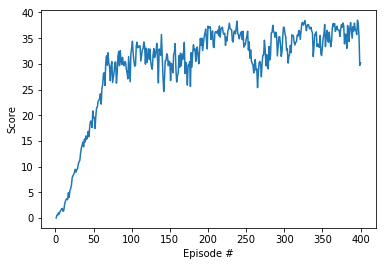

In [19]:
store_res = StoreResults()
agent = Agent(state_size=states.shape[1], action_size=action_size, random_seed=10)

def ddpg(n_episodes=400, max_t=1000): #400
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    #state = env.reset(train_mode=True)[brain_name].vector_observations
    max_score = -np.Inf
    max_mean = -np.Inf
    actor_loss = []
    critic_loss = []
    actor_loss_mean = []
    critic_loss_mean = []
    actor_loss_sum = []
    critic_loss_sum = []
    only_once = True
    loss_dict = {}
    eps_decay = 0.984
    eps = 1.0
    print("Starting training:")
    for i_episode in range(1, n_episodes+1):
        #state = env.reset()
        eps *= eps_decay
        state = env.reset(train_mode=True)[brain_name].vector_observations
        agent.reset()
        #score = 0
        score = np.zeros(20)
        #for t in range(max_t):
        t = 0
        while True:
            action = agent.act(state, eps)
            #eps *= eps_decay
            #pdb.set_trace()
            #next_state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards#[0]                         # get reward (for each agent)
            dones = env_info.local_done#[0]
            #pdb.set_trace()
            #for i in range(20):
            #    agent.step(state[i,:], action[i,:], rewards[i,:], next_states[i,:], dones[i,:], t)
            agent.step(state, action, rewards, next_states, dones, t)
            state = next_states
            actor_loss.append(agent.actor_loss)
            critic_loss.append(agent.critic_loss)
            
            #pdb.set_trace()
            score += rewards
            t += 1
            if np.any(dones):
                break 
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        actor_loss_mean.append(np.mean(actor_loss))
        critic_loss_mean.append(np.mean(actor_loss))
        actor_loss_sum.append(np.sum(actor_loss))
        critic_loss_sum.append(np.sum(critic_loss))
        #pdb.set_trace()
        if np.mean(score) > max_score:
                max_score = np.mean(score)
        print('\rEpisode {} Average Score: {:.2f} Score: {:.2f} Max Score: {:.4f} Eps: {:.2f} t: {} Min Score: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(score), max_score, eps, t, np.min(score)))#, end="")
        #if i_episode % 20 == 0:
        #    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        #    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        #    print('\rEpisode {}\tAverage Score: {:.2f}\tt: {}'.format(i_episode, np.mean(scores_deque), t))   
        if (i_episode > 100) & (np.mean(scores_deque) < 15):
            break
        if (i_episode > 40) & (np.mean(scores_deque) < 1):
            break
        
        if max_mean < np.mean(scores_deque):
            max_mean = np.mean(scores_deque)
            if max_mean > 30:
                print(f"Saving model with new max rolling mean of: {max_mean}")
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
                if only_once == True:
                    print("Lowering learning rates.")
                    agent.lr_actor = agent.lr_actor / 10
                    agent.lr_critic = agent.lr_critic / 10
                    agent.tau = agent.tau / 10
                    only_once = False
            
    loss_dict["actor_loss_mean"] = actor_loss_mean
    loss_dict["critic_loss_mean"] = critic_loss_mean
    loss_dict["actor_loss_sum"] = actor_loss_sum
    loss_dict["critic_loss_sum"] = critic_loss_sum
    return scores, scores_deque, loss_dict

scores, scores_deque, loss_dict = ddpg()

store_res.save("10/20 update, eps decay 0.984 per episode, medium time step, lower after return 30, 1e5 buffer, bs 256", scores, np.mean(scores_deque), loss_dict)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
4.02

In [5]:
store_res = StoreResults()

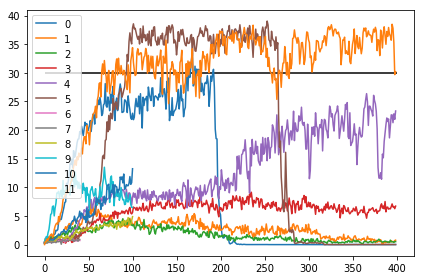

In [20]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
for k, v in store_res.dicto.items():
    plt.plot(store_res.dicto[k]["result"], label=k)

plt.hlines(30, 0, 400, colors='k', linestyles='solid', label='')#, *, data=None, **kwargs)
ax.legend()
plt.tight_layout()
    #print(olle[k]["result"])

In [6]:
import pandas as pd

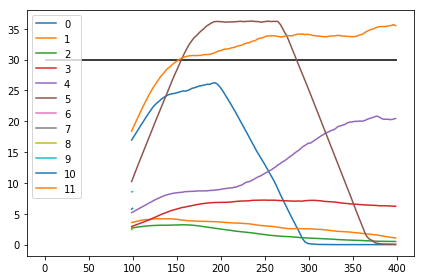

In [26]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
for k, v in store_res.dicto.items():
    mean_100 = pd.Series(store_res.dicto[k]["result"]).rolling(100).mean()
    plt.plot(mean_100, label=k)

plt.hlines(30, 0, 400, colors='k', linestyles='solid', label='')#, *, data=None, **kwargs)
ax.legend()
plt.tight_layout()
    #print(olle[k]["result"])

Text(0.5,1,'Rewards per Episode and Rolling Mean')

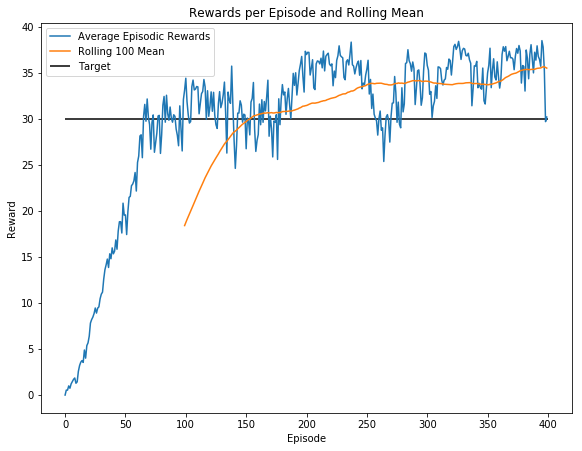

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(store_res.dicto[11]["result"], label="Average Episodic Rewards")
plt.plot(pd.Series(store_res.dicto[11]["result"]).rolling(100).mean(), label="Rolling 100 Mean")
plt.hlines(30, 0, 400, colors='k', linestyles='solid', label='Target')#, *, data=None, **kwargs)
plt.legend()
plt.tight_layout()
plt.ylabel("Reward")
plt.xlabel("Episode")
plt.title("Rewards per Episode and Rolling Mean")


In [24]:
import pandas as pd
pd.DataFrame(store_res.dicto).T

,BATCH_SIZE,BUFFER_SIZE,GAMMA,LR_ACTOR,LR_CRITIC,TAU,UPDATES,UPDATE_EVERY,WEIGHT_DECAY,actor_nn,ave_last_100,critic_nn,desc,result
0,128,100000,0.99,0.001,0.001,0.001,1,1,0,"[33, 256, 128, 4]",0.00635,"[33, 256, 256, 128, 1]","larger NN, update20","[0.412999990769, 1.11649997504, 0.899499979895..."
1,128,100000,0.99,0.0001,0.0001,0.001,1,1,0,"[33, 256, 128, 4]",1.07775,"[33, 256, 256, 128, 1]",lower time step,"[0.38249999145, 0.530499988142, 0.504999988712..."
2,128,100000,0.99,0.0001,0.0001,0.001,10,20,0,"[33, 256, 128, 4]",0.51569,"[33, 256, 256, 128, 1]","20/10 update, lower time step","[0.267499994021, 0.64649998555, 0.617499986198..."
3,128,1000000,0.99,0.001,0.001,0.001,10,20,0,"[33, 256, 128, 4]",6.21811,"[33, 256, 256, 128, 1]","20/10 update, higher time step, 1e6 buffer","[0.460999989696, 0.507999988645, 0.61149998633..."
4,128,100000,0.99,0.001,0.001,0.001,1,1,0,"[33, 256, 128, 4]",20.4541,"[33, 256, 256, 128, 1]","1/1 update, eps decay 0.988 per timestep, high...","[0.304999993183, 0.362999991886, 0.52549998825..."
5,128,100000,0.99,0.001,0.001,0.001,1,1,0,"[33, 256, 128, 4]",0.06129,"[33, 256, 256, 128, 1]","1/1 update, eps decay 0.984 per episode, highe...","[0.311499993037, 0.385999991372, 0.40499999094..."


In [6]:
import pickle
f = open("file.pkl", "rb")
dicto = pickle.load(f)
f.close()

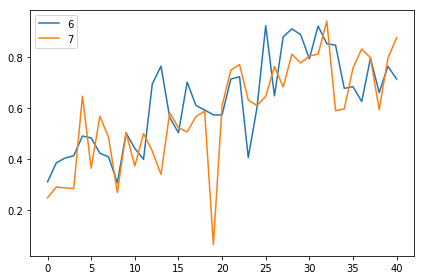

In [18]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
for k, v in store_res.dicto.items():
    if k >5:
        plt.plot(store_res.dicto[k]["result"], label=k)

ax.legend()
plt.tight_layout()
    #print(olle[k]["result"])

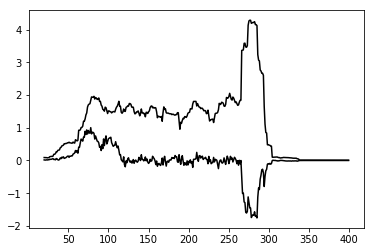

In [33]:
#pd.Series(store_res.dicto[5]["result"]).rolling(20).mean().plot(style='k')
# add the 20 day rolling variance:
#pd.Series(store_res.dicto[5]["result"]).rolling(20).std().plot(style='b')
pd.Series(store_res.dicto[5]["result"]).diff().rolling(20).mean().plot(style='k')
pd.Series(store_res.dicto[5]["result"]).diff().rolling(20).std().plot(style='k')



In [26]:
agent = Agent(state_size=states.shape[1], action_size=action_size, random_seed=10)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

Starting training:
Episode 1 Average Score: 32.71 Score: 32.71 Max Score: 32.7110 Eps: 0.98 t: 1001 Min Score: 25.30
Episode 2 Average Score: 31.45 Score: 30.19 Max Score: 32.7110 Eps: 0.97 t: 1001 Min Score: 16.93
Episode 3 Average Score: 31.72 Score: 32.26 Max Score: 32.7110 Eps: 0.95 t: 1001 Min Score: 19.87
Episode 4 Average Score: 31.48 Score: 30.75 Max Score: 32.7110 Eps: 0.94 t: 1001 Min Score: 13.59
Episode 5 Average Score: 31.72 Score: 32.67 Max Score: 32.7110 Eps: 0.92 t: 1001 Min Score: 23.29
Episode 6 Average Score: 31.55 Score: 30.74 Max Score: 32.7110 Eps: 0.91 t: 1001 Min Score: 23.81
Episode 7 Average Score: 31.62 Score: 32.01 Max Score: 32.7110 Eps: 0.89 t: 1001 Min Score: 19.19
Episode 8 Average Score: 31.62 Score: 31.65 Max Score: 32.7110 Eps: 0.88 t: 1001 Min Score: 16.37
Episode 9 Average Score: 31.66 Score: 32.00 Max Score: 32.7110 Eps: 0.86 t: 1001 Min Score: 22.12
Episode 10 Average Score: 31.81 Score: 33.08 Max Score: 33.0810 Eps: 0.85 t: 1001 Min Score: 22.78


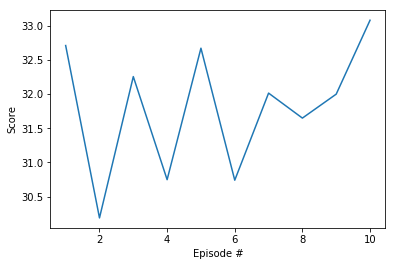

In [28]:

agent = Agent(state_size=states.shape[1], action_size=action_size, random_seed=10)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
#agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

def ddpg2(n_episodes=10): #400
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    max_score = -np.Inf
    max_mean = -np.Inf
    eps_decay = 0.984
    eps = 1.0
    print("Starting training:")
    for i_episode in range(1, n_episodes+1):
        eps *= eps_decay
        state = env.reset(train_mode=True)[brain_name].vector_observations
        score = np.zeros(20)
        t = 0
        while True:
            action = agent.act2(state)#, eps)
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards#[0]                         # get reward (for each agent)
            dones = env_info.local_done#[0]

            score += rewards
            t += 1
            state = next_states
            if np.any(dones):
                break 
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        if np.mean(score) > max_score:
                max_score = np.mean(score)
        print('\rEpisode {} Average Score: {:.2f} Score: {:.2f} Max Score: {:.4f} Eps: {:.2f} t: {} Min Score: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(score), max_score, eps, t, np.min(score)))#, end="")
    return scores

scores = ddpg2()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()